In [22]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T

/var/folders/np/chqdmqld4h98fpysyglct_4m0000gp/T/ipykernel_55361/265244900.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 1000).T


In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

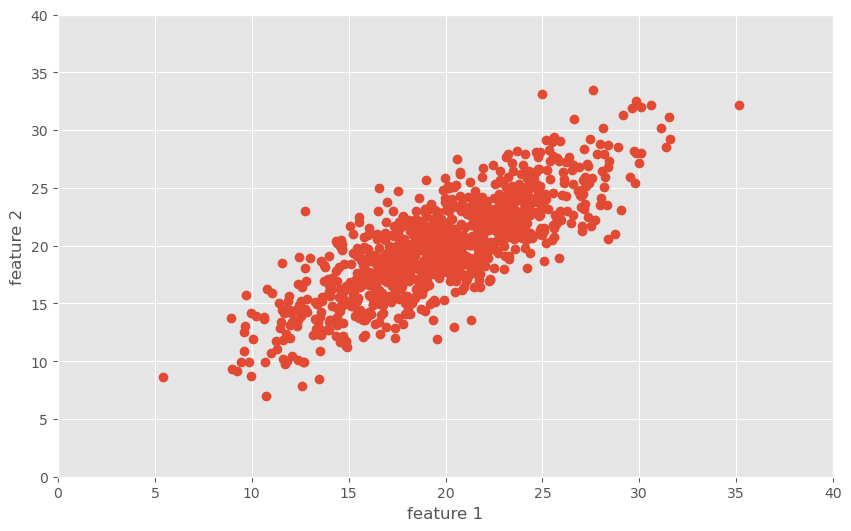

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [25]:
X = np.vstack((x, y)).T

#### opnenCV で PCA

In [26]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

In [29]:
mean[0], mean[1], eig[:, 0], eig[:, 1]

(20, 20, array([ 0.71481632, -0.69931225]), array([0.69931225, 0.71481632]))

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

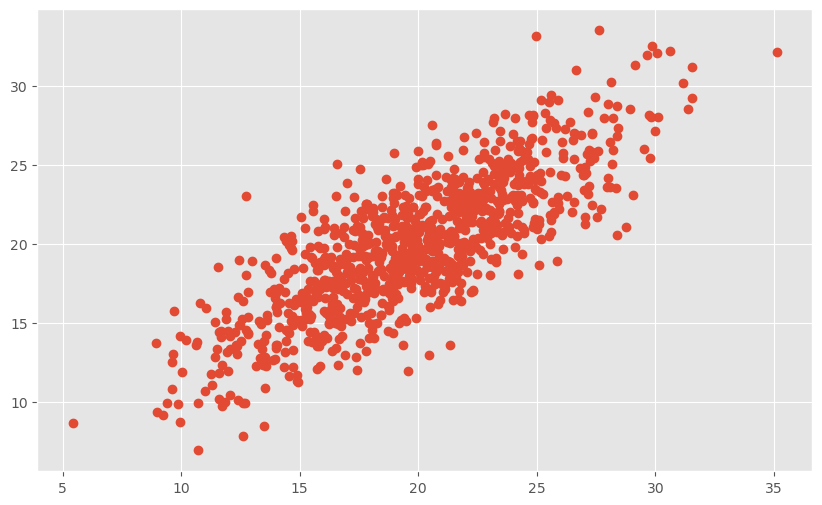

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [30]:
X2 = cv2.PCAProject(X, mu, eig)

(-20.0, 20.0, -10.0, 10.0)

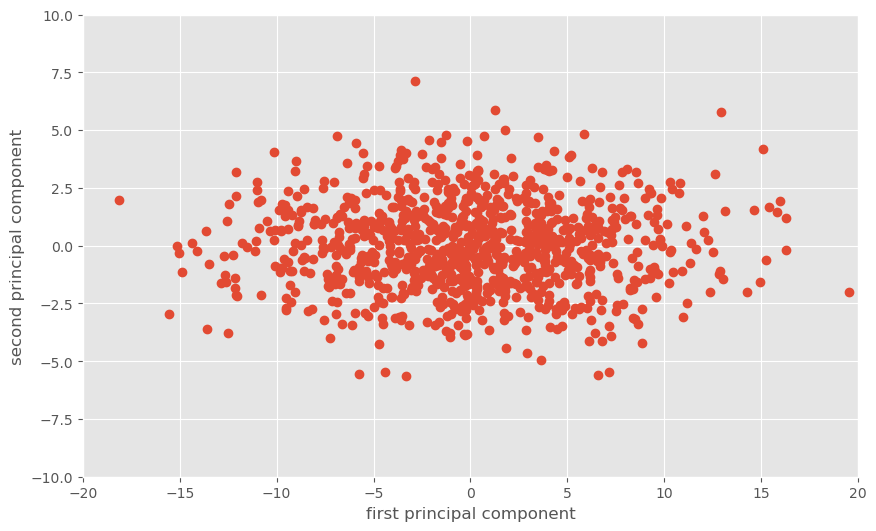

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

In [32]:
from sklearn import decomposition

In [33]:
ica = decomposition.FastICA()

In [34]:
X2 = ica.fit_transform(X)

/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


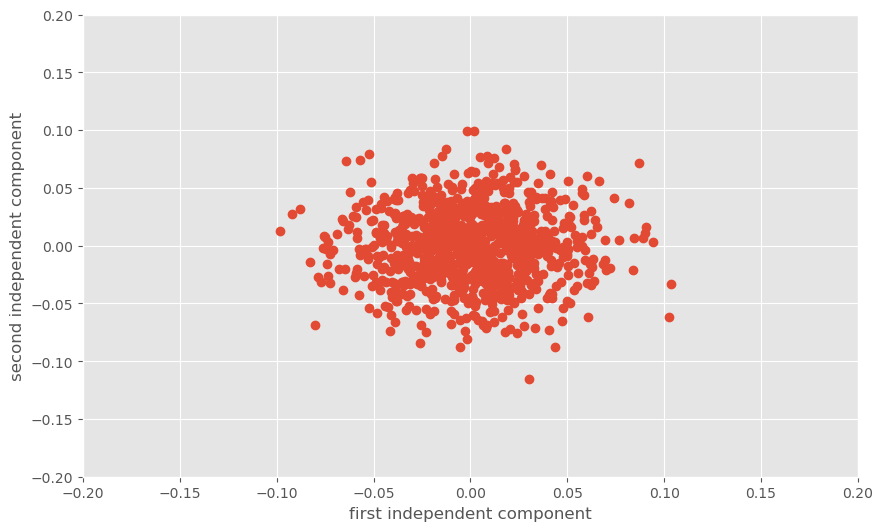

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])
plt.savefig('ica.png')

In [36]:
nmf = decomposition.NMF()

In [37]:
X2 = nmf.fit_transform(X)

(0.0, 7.0, 0.0, 15.0)

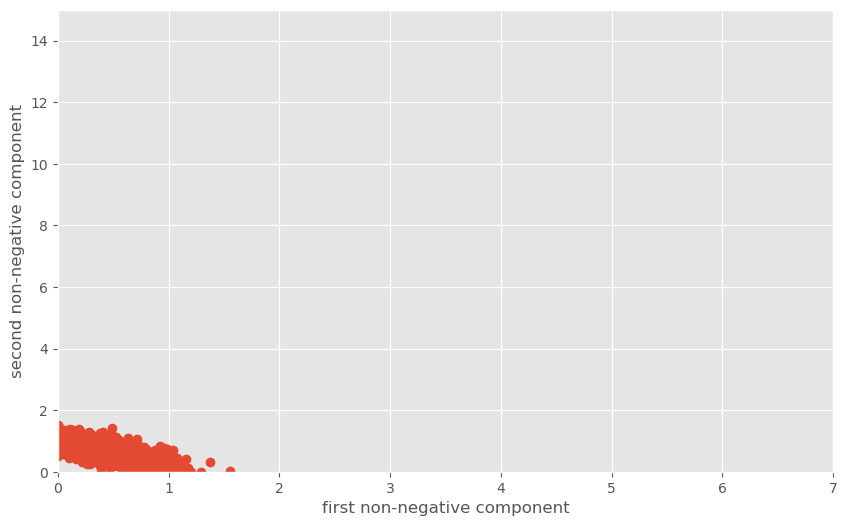

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])